In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!pip install jiwer
!pip install datasets
!pip install -U "huggingface_hub[cli]"

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGrained).
The token `common_voice_token` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: 

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from IPython import display
from jiwer import wer
import os
from scipy.io.wavfile import write
from IPython.display import Audio
import soundfile as sf
from datasets import load_dataset

## Loading Common Voice Dataset

In [ ]:
# common_voice_asante_twi_tts = load_dataset("kojo-george/asante-twi-tts", split="train")
common_voice_asante_twi_tts = load_dataset("Lagyamfi/akan_audio_processed")
common_voice_asante_twi_tts = common_voice_asante_twi_tts.map(lambda example, idx: {"file_name": f"{idx + 1}.wav"}, with_indices=True)
common_voice_asante_twi_tts

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/3.33k [00:00<?, ?B/s]

(…)-00000-of-00001-2c875d50b966a0c3.parquet:   0%|          | 0.00/427M [00:00<?, ?B/s]

(…)-00000-of-00001-fd53689d8cd93e01.parquet:   0%|          | 0.00/42.5M [00:00<?, ?B/s]

(…)-00000-of-00001-1a99ff63881e72f6.parquet:   0%|          | 0.00/401M [00:00<?, ?B/s]

(…)-00000-of-00001-90a03b720802dd8b.parquet:   0%|          | 0.00/39.9M [00:00<?, ?B/s]

(…)-00000-of-00001-96eebeaa90b67462.parquet:   0%|          | 0.00/427M [00:00<?, ?B/s]

(…)-00000-of-00001-c99c0f127fb193a1.parquet:   0%|          | 0.00/42.5M [00:00<?, ?B/s]

(…)-00000-of-00001-0c2206bfbd5251a0.parquet:   0%|          | 0.00/427M [00:00<?, ?B/s]

(…)-00000-of-00001-6c2128918f634caf.parquet:   0%|          | 0.00/42.4M [00:00<?, ?B/s]

(…)-00000-of-00001-c85ce3a906b68749.parquet:   0%|          | 0.00/428M [00:00<?, ?B/s]

(…)-00000-of-00001-7ffe9d099283fb87.parquet:   0%|          | 0.00/42.5M [00:00<?, ?B/s]

(…)-00000-of-00001-348c75967c18abee.parquet:   0%|          | 0.00/427M [00:00<?, ?B/s]

(…)-00000-of-00001-881f34dd325d171a.parquet:   0%|          | 0.00/42.4M [00:00<?, ?B/s]

(…)-00000-of-00001-8fe36e554d2708bb.parquet:   0%|          | 0.00/231M [00:00<?, ?B/s]

(…)-00000-of-00001-80e813527c04a6d2.parquet:   0%|          | 0.00/19.5M [00:00<?, ?B/s]

(…)-00000-of-00001-4ed2332607e54042.parquet:   0%|          | 0.00/394M [00:00<?, ?B/s]

(…)-00000-of-00001-62d67e7f2a36e318.parquet:   0%|          | 0.00/36.7M [00:00<?, ?B/s]

(…)-00000-of-00001-1ab6ab9a56b2b2a1.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

(…)-00000-of-00001-c27463594140751f.parquet:   0%|          | 0.00/42.3M [00:00<?, ?B/s]

(…)-00000-of-00001-b02b7fffc259c769.parquet:   0%|          | 0.00/427M [00:00<?, ?B/s]

(…)-00000-of-00001-c2f94de797828422.parquet:   0%|          | 0.00/42.5M [00:00<?, ?B/s]

(…)-00000-of-00001-48eef2c9c334ec9b.parquet:   0%|          | 0.00/427M [00:00<?, ?B/s]

(…)-00000-of-00001-d501a38be7eb2ed2.parquet:   0%|          | 0.00/42.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2187 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/259 [00:00<?, ? examples/s]

Generating train_Crop_Aug split:   0%|          | 0/2187 [00:00<?, ? examples/s]

Generating test_Crop_Aug split:   0%|          | 0/259 [00:00<?, ? examples/s]

Generating train_Loudness_Aug split:   0%|          | 0/2187 [00:00<?, ? examples/s]

Generating test_Loudness_Aug split:   0%|          | 0/259 [00:00<?, ? examples/s]

Generating train_Mask_Aug split:   0%|          | 0/2187 [00:00<?, ? examples/s]

Generating test_Mask_Aug split:   0%|          | 0/259 [00:00<?, ? examples/s]

Generating train_Noise_Aug split:   0%|          | 0/2187 [00:00<?, ? examples/s]

Generating test_Noise_Aug split:   0%|          | 0/259 [00:00<?, ? examples/s]

Generating train_Pitch_Aug split:   0%|          | 0/2187 [00:00<?, ? examples/s]

Generating test_Pitch_Aug split:   0%|          | 0/259 [00:00<?, ? examples/s]

Generating train_Shift_Aug split:   0%|          | 0/2187 [00:00<?, ? examples/s]

Generating test_Shift_Aug split:   0%|          | 0/259 [00:00<?, ? examples/s]

Generating train_Speed_Aug split:   0%|          | 0/2187 [00:00<?, ? examples/s]

Generating test_Speed_Aug split:   0%|          | 0/259 [00:00<?, ? examples/s]

Generating train_Vtlp_Aug split:   0%|          | 0/2187 [00:00<?, ? examples/s]

Generating test_Vtlp_Aug split:   0%|          | 0/259 [00:00<?, ? examples/s]

Generating train_Normalize_Aug split:   0%|          | 0/2187 [00:00<?, ? examples/s]

Generating test_Normalize_Aug split:   0%|          | 0/259 [00:00<?, ? examples/s]

Generating train_PolarityInverse_Aug split:   0%|          | 0/2187 [00:00<?, ? examples/s]

Generating test_PolarityInverse_Aug split:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/2187 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/2187 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/2187 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/2187 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/2187 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/2187 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/2187 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/2187 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/2187 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/2187 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/2187 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['audio', 'sentence', 'file_name'],
        num_rows: 2187
    })
    test: Dataset({
        features: ['audio', 'sentence', 'file_name'],
        num_rows: 259
    })
    train_Crop_Aug: Dataset({
        features: ['audio', 'sentence', 'file_name'],
        num_rows: 2187
    })
    test_Crop_Aug: Dataset({
        features: ['audio', 'sentence', 'file_name'],
        num_rows: 259
    })
    train_Loudness_Aug: Dataset({
        features: ['audio', 'sentence', 'file_name'],
        num_rows: 2187
    })
    test_Loudness_Aug: Dataset({
        features: ['audio', 'sentence', 'file_name'],
        num_rows: 259
    })
    train_Mask_Aug: Dataset({
        features: ['audio', 'sentence', 'file_name'],
        num_rows: 2187
    })
    test_Mask_Aug: Dataset({
        features: ['audio', 'sentence', 'file_name'],
        num_rows: 259
    })
    train_Noise_Aug: Dataset({
        features: ['audio', 'sentence', 'file_name'],
       

In [ ]:
import re
def preprocess_function(example):
    # Remove full stops and commas, and convert to lowercase
    cleaned_sentence = re.sub(r"[.,]", "", example['sentence']).lower()
    example['sentence'] = cleaned_sentence
    return example

In [ ]:
common_voice_asante_twi_tts = common_voice_asante_twi_tts.map(preprocess_function)

Map:   0%|          | 0/2187 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/2187 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/2187 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/2187 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/2187 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/2187 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/2187 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/2187 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/2187 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/2187 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/2187 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

In [ ]:
# split_dataset = common_voice_asante_twi_tts.train_test_split(test_size=0.1)
asante_twi_tts_train = common_voice_asante_twi_tts['train']
asante_twi_tts_test = common_voice_asante_twi_tts['test']


## Data Transformation Common Voice Dataset

In [ ]:
asante_twi_tts_train_final = asante_twi_tts_train.rename_column('sentence', 'transcription')
asante_twi_tts_test_final = asante_twi_tts_test.rename_column('sentence', 'transcription')

##Splitting Common Voice DataSet to Training and Test


## Combining all Data Sets


In [ ]:
print(f"Size of training set: {len(asante_twi_tts_train_final)}")
print(f"Size of validating set: {len(asante_twi_tts_test_final)}")


Size of training set: 2187
Size of validating set: 259


In [ ]:
for i, sample in enumerate(asante_twi_tts_train_final):
  audio_array = sample['audio']['array']
  sampling_rate = sample['audio']['sampling_rate']
  file_path = f"{sample['file_name']}"  # Example path

    # Save the audio file using soundfile
  sf.write(file_path, audio_array, sampling_rate)

In [ ]:
for i, sample in enumerate(asante_twi_tts_test_final):
    audio_array = sample['audio']['array']
    sampling_rate = sample['audio']['sampling_rate']
    file_path = f"{sample['file_name']}"  # Example path

    # Save the audio file using soundfile
    sf.write(file_path, audio_array, sampling_rate)

## Pre-Processing Data

In [ ]:
characters = [x for x in "abdeɛfghiklmnoɔprstuwyABDEƐFGHIKLMNOƆPRSTUWY',?!. "]
#mapping characters to integers
char_to_num = keras.layers.StringLookup(vocabulary=characters, oov_token="")
#Mapping integers back to original characters
num_to_char = keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="",invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()}"
    f"(size={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'd', 'e', 'ɛ', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'ɔ', 'p', 'r', 's', 't', 'u', 'w', 'y', 'A', 'B', 'D', 'E', 'Ɛ', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'Ɔ', 'P', 'R', 'S', 'T', 'U', 'W', 'Y', "'", ',', '?', '!', '.', ' '](size=51)


In [ ]:
for char in ['ɛ']:
    encoded = char_to_num(tf.constant([char]))
    decoded = num_to_char(encoded)
    print(f"Character: '{char}' | Encoded: {encoded.numpy()} | Decoded: {decoded.numpy()[0].decode('utf-8')}")

Character: 'ɛ' | Encoded: [5] | Decoded: ɛ


In [ ]:
char_to_num

<StringLookup name=string_lookup, built=False>

In [ ]:
import numpy as np
import librosa
frame_length = 256
frame_step = 160
fft_length = 384

def encode_hugging_face_sample(output_path, label):
  file = tf.io.read_file(output_path)

  audio, _ = tf.audio.decode_wav(file)
  audio = tf.squeeze(audio, axis=-1)
  audio = tf.cast(audio, tf.float32)


  spectrogram = tf.signal.stft(
      audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length
  )
  spectrogram = tf.abs(spectrogram)
  spectrogram = tf.math.pow(spectrogram, 0.5)

  means =tf.math.reduce_mean(spectrogram, 1,keepdims=True)
  stddevs = tf.math.reduce_std(spectrogram, 1, keepdims=True)
  spectrogram = tf.cast(spectrogram, tf.float32)
  spectrogram = (spectrogram- means)/(stddevs + 1e-10)

  label = tf.strings.lower(label)

  label = tf.strings.unicode_split(label, input_encoding="UTF-8")

  label = char_to_num(label)
  return spectrogram, label

# **Creating** Dataset **Objects**

In [ ]:
batch_size = 16
import tensorflow as tf

text = tf.constant((list(asante_twi_tts_train['sentence'])[0]))
split_text = tf.strings.unicode_split(text, "UTF-8")
generated = char_to_num(split_text)
final = tf.strings.reduce_join(num_to_char(generated)).numpy().decode("utf-8")

print(final)

train_dataset = tf.data.Dataset.from_tensor_slices(
    (list(asante_twi_tts_train['file_name']), list(asante_twi_tts_train['sentence']))
)
print(list(asante_twi_tts_train['sentence'])[0])

train_dataset = (
    train_dataset
    .map(encode_hugging_face_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)  # Batch your dataset
    .prefetch(buffer_size=tf.data.AUTOTUNE)  # Prefetch to overlap preprocessing with training
)

validation_dataset = tf.data.Dataset.from_tensor_slices(
    (list(asante_twi_tts_test['file_name']), list(asante_twi_tts_test['sentence']))
)

validation_dataset = (
    validation_dataset
    .map(encode_hugging_face_sample, num_parallel_calls=tf.data.AUTOTUNE)  # Map your encoding function
    .padded_batch(batch_size)  # Batch your dataset
    .prefetch(buffer_size=tf.data.AUTOTUNE)  # Prefetch to overlap preprocessing with training
)





ɔbɛdi hene afiri po so akɔsi po so de afiri asubɔnten no so akɔsi asase ano
ɔbɛdi hene afiri po so akɔsi po so de afiri asubɔnten no so akɔsi asase ano


## Visualizing the Data

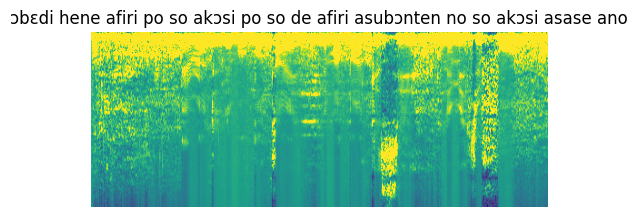

In [ ]:
fig = plt.figure(figsize=(8,5))
for batch in train_dataset.take(1):
  spectogram = batch[0][0].numpy()
  spectogram = np.array([np.trim_zeros(x) for x in np.transpose(spectogram)])
  label = batch[1][0]
  label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
  ax = plt.subplot(2,1,1)
  ax.imshow(spectogram, vmax=1)
  ax.set_title(label)
  ax.axis("off")

plt.show()

## Creating the model


Define CTC Loss function

In [ ]:
def CTCLoss(y_true, y_pred):
    # Compute the training-time loss value
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

Define Model

In [ ]:
def build_model(input_dim, output_dim, rnn_layers=5, rnn_units=128):
    """Model similar to DeepSpeech2."""
    # Model'
    with tf.device('/GPU:0'):
      input_spectrogram = layers.Input((None, input_dim), name="input")
      x = layers.Reshape((-1, input_dim, 1), name="expand_dim")(input_spectrogram)
      #Convolution.layer 1
      x = layers.Conv2D(
          filters=32,
          kernel_size=[11, 41],
          strides=[2,2],
          padding="same",
          use_bias=False,
          name="conv_1",
      )(x)
      x = layers.BatchNormalization(name="conv_1_bn")(x)
      x = layers.ReLU(name="conv_1_relu")(x)

      # Convolution layer 2
      x = layers.Conv2D(
          filters=32,
          kernel_size=[11, 21],
          strides=[1,2],
          padding="same",
          use_bias=False,
          name="conv_2",
      )(x)
      x = layers.BatchNormalization(name="conv_2_bn")(x)
      x = layers.ReLU(name="conv_2_relu")(x)

      x = layers.Reshape((-1, x.shape[-2] * x.shape[-1]))(x)
      for i in range(1, rnn_layers + 1):
          recurrent = layers.GRU(
              units=rnn_units,
              activation="tanh",
              recurrent_activation="sigmoid",
              use_bias=True,
              return_sequences=True,
              reset_after=True,
              name=f"gru_{i}",
          )
          x = layers.Bidirectional(
              recurrent, name=f"bidirectional_{i}", merge_mode="concat"
          )(x)
          if i < rnn_layers:
              x = layers.Dropout(rate=0.3)(x)

      x = layers.Dense(units=rnn_units * 2, name="dense_output")(x)
      x = layers.ReLU(name="dense_1_relu")(x)
      x = layers.Dropout(rate=0.3)(x)

      output = layers.Dense(units=output_dim + 1, activation="softmax")(x)
      model = keras.Model(input_spectrogram, output, name="DeepSpeech_2")
      opt = keras.optimizers.Adam(learning_rate=1e-4)
      model.compile(optimizer=opt, loss=CTCLoss)
      return model


In [ ]:
with tf.device('/GPU:0'):
  model = build_model(
      input_dim=fft_length // 2 + 1,
      output_dim=char_to_num.vocabulary_size(),
      rnn_units=512,
  )
  model.summary(line_length=110)

Model: "DeepSpeech_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                   ┃ Output Shape                        ┃             Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                             │ (None, None, 193)                   │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ expand_dim (Reshape)                           │ (None, None, 193, 1)                │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_1 (Conv2D)                                │ (None, None, 97, 32)                │              14,432 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_1_bn (BatchNormalization)                 │ (None, None, 97, 32)                │                 128 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_1_relu (ReLU)                             │ (None, None, 97, 32)                │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_2 (Conv2D)                                │ (None, None, 49, 32)                │             236,544 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_2_bn (BatchNormalization)                 │ (None, None, 49, 32)                │                 128 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_2_relu (ReLU)                             │ (None, None, 49, 32)                │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ reshape (Reshape)                              │ (None, None, 1568)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ bidirectional_1 (Bidirectional)                │ (None, None, 1024)                  │           6,395,904 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dropout (Dropout)                              │ (None, None, 1024)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ bidirectional_2 (Bidirectional)                │ (None, None, 1024)                  │           4,724,736 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dropout_1 (Dropout)                            │ (None, None, 1024)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ bidirectional_3 (Bidirectional)                │ (None, None, 1024)                  │           4,724,736 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dropout_2 (Dropout)                            │ (None, None, 1024)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ bidirectional_4 (Bidirectional)                │ (None, None, 1024)                  │           4,724,736 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dropout_3 (Dropout)                            │ (None, None, 1024)                  │                   0 │
├───

 Total params: 26,648,980 (101.66 MB)

 Trainable params: 26,648,852 (101.66 MB)

 Non-trainable params: 128 (512.00 B)

##Training and Evaluating

In [ ]:
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0]
    output_text = []
    for result in results:
        result = tf.strings.reduce_join(num_to_char(result)).numpy().decode("utf-8")
        output_text.append(result)
    return output_text

class CallbackEval(keras.callbacks.Callback):
    """Displays a batch of outputs after every epoch."""

    def __init__(self, dataset):
        super().__init__()
        self.dataset = dataset

    def on_epoch_end(self, epoch: int, logs=None):
        predictions = []
        targets = []
        for batch in self.dataset:
            X, y = batch
            batch_predictions = model.predict(X)
            # print("RAW ", batch_predictions)
            batch_predictions = decode_batch_predictions(batch_predictions)
            # print("DECODED ", batch_predictions)
            predictions.extend(batch_predictions)
            for label in y:
                label = (
                    tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
                )
                targets.append(label)
        wer_score = wer(targets, predictions)
        print("-" * 100)
        print(targets)
        print(predictions)
        print(f"Word error rate: {wer_score:.4f}")
        print("-" * 100)


#Training

In [ ]:
# from tf.keras.callbacks import EarlyStopping, TensorBoard
epochs = 50
validation_callback = CallbackEval(validation_dataset)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

with tf.device('/GPU:0'):
  history = model.fit(
      train_dataset,
      validation_data=validation_dataset,
      epochs=epochs,
      callbacks=[validation_callback, early_stopping],
  )

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step
----------------------------------------------------------------------------------------------------
['awurade ne me botan ne mabankɛseɛ ne me gyefoɔ', 'me nyankopɔn ne me botantim a medwane kɔtoa no', 'me kyɛm ne me nkwagyeɛ abɛn mabantenten', 'mesu mefrɛ awurade ɔno a ɔfata sɛ wɔyi no ayɛ', 'na wɔagye me matamfoɔ nsam', 'owuo nhoma

#Inference

In [ ]:
predictions = []
targets = []
for batch in validation_dataset:
    X, y = batch
    batch_predictions = model.predict(X)
    batch_predictions = decode_batch_predictions(batch_predictions)
    predictions.extend(batch_predictions)
    for label in y:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        targets.append(label)
wer_score = wer(targets, predictions)
print("-" * 100)
print(f"Word error rate: {wer_score:.4f}")
print("-" * 100)
for i in np.random.randint(0, len(predictions), 5):
    print(f"Target    : {targets[i]}")
    print(f"Prediction: {predictions[i]}")
    print("-" * 100)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
----------------------------------------------------------------------------------------------------
Word error rate: 0.8379
----------------------------------------------------------------------------------------------------
Target    : ɛno na ɔbɛkasa akyerɛ wɔn nabufuo mu
Prediction: no na ɔbɛkat kyerɛ wɔde tfi i
--------------------------------